<a href="https://colab.research.google.com/github/deepasrii/Circle_Detector/blob/main/circle_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

README

CIRCLE DETECTOR

Here, I need to find a solution for the given image, to find whether the image has a circular region and if so evaluate if the given pixel is inside that circular region. 

given, the Input: image, (x,y) 

check if the pixel coordinate (x,y) is inside or outside the circular region,If a circular region is present.

Import libraries cv2, numpy and matplotlib. Using opencv, upload the image and convert it into grayscale. 
Then, gaussianblur is used to blur the image because hough circle method works better with the blurred images.
HoughCircles function is used to detect circles in the image by giving the required parameters. 

To check whether the given pixel coordinates are inside or outside, the General Equation for a Circle denotes: 

(x - a)^2 + (y - b)^2 = r^2 
where, (a,b) - coordinates of the center of the circle, r - radius of the circle.

Finally, the circle_detector detects the circle in the input image and outlines it in green.

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
%matplotlib inline

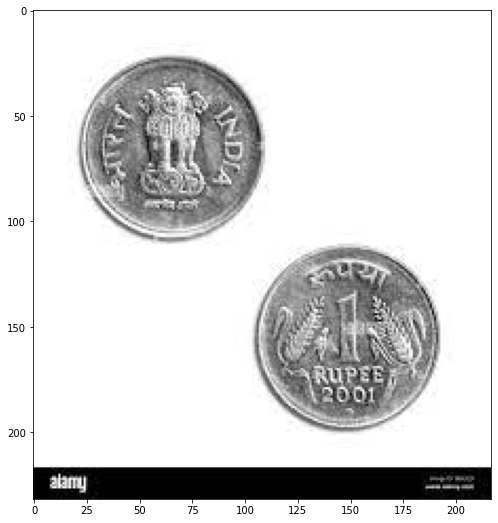

In [3]:
# load the image
path_to_image = cv2.imread(r'/content/drive/MyDrive/sample_images/download.jpeg') 

# convert to grayscale 
gray = cv2.cvtColor(path_to_image, cv2.COLOR_BGR2GRAY)
plt.rcParams['figure.figsize'] = (16,9)
plt.imshow(gray,cmap='gray')

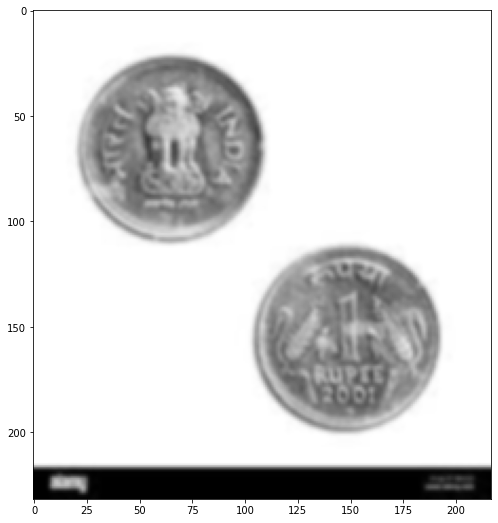

In [4]:
# blur the image because hough circle method works better with the blurred images
blur = cv2.GaussianBlur(gray,(5,5),0);
plt.rcParams['figure.figsize'] = (16,9)
plt.imshow(blur,cmap='gray')

Circle Detected
Enter x value:50
50.0
Enter y value : 50
50.0
The given pixel coordinates are inside the circle


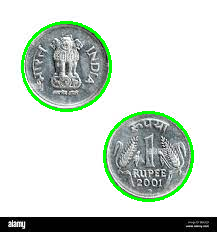

In [5]:
# detect circles in the image using Houghcircles

minDist = 120    # distance between the center of the circle
dp = 1           # ratio of the image space to the size of the accumulator
param1 = 50      # used for edge detection
param2 = 30      # used for edge detection
minRadius = 5    # min. size of the radius
maxRadius = 300  # max. size of the radius

circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, dp, minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)

# ensure at least some circles were found
if circles is not None:
    print("Circle Detected")
    x = float(input("Enter x value:")) # enter the pixel coordinate
    print(x)
    y = float(input("Enter y value : ")) # enter the pixel coordinate
    print(y)
    circles = np.uint16(np.around(circles)) # returns an array of float that is changed to integer values
    for i in circles[0,:]:
        a,b,r = i[0],i[1],i[2]
        cv2.circle(path_to_image, (a, b), r, (0, 255, 0), 2)

    if ((x - a)**2 + (y - b)**2 <= r * r): # (a,b) - center of the circle, r - radius of the circle, (x,y) - circumference points
        print("The given pixel coordinates are inside the circle")
    else:
        print("The given pixel coordinates are outside the circle")
    cv2_imshow(path_to_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
 print("circle not detected")